In [13]:
import pandas as pd
import ast
import fjos
import os
from datetime import datetime
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score



In [14]:
# Pasiimam is failu informacija

litgrid_raw_pd = fjos.litgrid_data_to_pd('C:\\Users\\runda\\Desktop\\Python mokymai\\Galutinis Projektas Elektros prognoze vs Orai\\Duomenys\\dashboard_data_2022-07-01_2024-07-01.csv')
vilnius_pd= fjos.meteo_file_to_pd('C:\\Users\\runda\\Desktop\\Python mokymai\\Galutinis Projektas Elektros prognoze vs Orai\\Duomenys\\vilniaus-ams.csv')
# vilnius = fjos.duom_paruosimas(vilnius_pd)


In [15]:
litgrid_raw_pd

,Time,Predicted electricity consumption by Ignitis,Actual electricity consumption,Month,Week,Hour
0,2022-07-01 00:00:00,1225.0,1246.044,7,4,0
1,2022-07-01 01:00:00,1143.0,1163.384,7,4,1
2,2022-07-01 02:00:00,1114.0,1130.666,7,4,2
3,2022-07-01 03:00:00,1100.0,1118.605,7,4,3
4,2022-07-01 04:00:00,1073.0,1112.705,7,4,4
...,...,...,...,...,...,...
17563,2024-07-01 19:00:00,1428.0,1429.136,7,0,19
17564,2024-07-01 20:00:00,1411.0,1363.344,7,0,20
17565,2024-07-01 21:00:00,1382.0,1348.061,7,0,21
17566,2024-07-01 22:00:00,1329.0,1321.252,7,0,22


In [16]:
# # Sujungiame oru stebejimo ir elektros vartojimo duomenis
#
df = pd.concat([litgrid_raw_pd, vilnius_pd], axis="columns")
df = df.drop(columns=['Time(Meteo)'])
df = df.set_index('Time')
df.head(20)


,Predicted electricity consumption by Ignitis,Actual electricity consumption,Month,Week,Hour,airTemperature,cloudCover
Time,,,,,,,
2022-07-01 00:00:00,1225.0,1246.044,7,4,0,21.0,0.0
2022-07-01 01:00:00,1143.0,1163.384,7,4,1,20.0,0.0
2022-07-01 02:00:00,1114.0,1130.666,7,4,2,20.0,0.0
2022-07-01 03:00:00,1100.0,1118.605,7,4,3,20.0,0.0
2022-07-01 04:00:00,1073.0,1112.705,7,4,4,20.0,0.0
2022-07-01 05:00:00,1117.0,1141.764,7,4,5,22.0,0.0
2022-07-01 06:00:00,1289.0,1319.119,7,4,6,24.0,0.0
2022-07-01 07:00:00,1471.0,1500.649,7,4,7,26.0,10.0
2022-07-01 08:00:00,1604.0,1647.762,7,4,8,25.0,10.0


In [17]:
df

,Predicted electricity consumption by Ignitis,Actual electricity consumption,Month,Week,Hour,airTemperature,cloudCover
Time,,,,,,,
2022-07-01 00:00:00,1225.0,1246.044,7,4,0,21.0,0.0
2022-07-01 01:00:00,1143.0,1163.384,7,4,1,20.0,0.0
2022-07-01 02:00:00,1114.0,1130.666,7,4,2,20.0,0.0
2022-07-01 03:00:00,1100.0,1118.605,7,4,3,20.0,0.0
2022-07-01 04:00:00,1073.0,1112.705,7,4,4,20.0,0.0
...,...,...,...,...,...,...,...
2024-07-01 19:00:00,1428.0,1429.136,7,0,19,18.0,90.0
2024-07-01 20:00:00,1411.0,1363.344,7,0,20,18.0,90.0
2024-07-01 21:00:00,1382.0,1348.061,7,0,21,17.0,90.0


In [18]:
# Isskaidome DF i savybes pagal kurias prognozuosime elektros suvartojima

X = df.drop(columns=['Predicted electricity consumption by Ignitis', 'Actual electricity consumption'])
y = df['Actual electricity consumption']
X.head(5)

X_be_oru = df.drop(columns=['Predicted electricity consumption by Ignitis', 'Actual electricity consumption', 'airTemperature', 'cloudCover'])
y_be_oru = df['Actual electricity consumption']

In [19]:
# Pasiimam savaites laikotarpio testinius duomenis, pagal kuriuos analizuosime grafikus

testdata = df.tail(169)

Xtest = testdata[['Month', 'Week', 'Hour', 'airTemperature', 'cloudCover']]
ytest = testdata['Actual electricity consumption']

testdata_be_oru = df.tail(169)

Xtest_be_oru = testdata_be_oru[['Month', 'Week', 'Hour']]
ytest_be_oru = testdata_be_oru['Actual electricity consumption']

In [20]:
# Suskirstome duomenis i modelio treniravimo ir testinius

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_be_oru, X_test_be_oru, y_train_be_oru, y_test_be_oru = train_test_split(X_be_oru, y_be_oru, test_size=0.2, random_state=42)


Pasirinkti ML modeliai, kuriu pagalba bus atliekamos prognozes:
LinearRegression
Ridge
DecisionTreeRegressor
GradientBoostingRegressor


Geriausiu parametru paieska parinktiems modeliams

In [21]:
# Geriausiu parametru paieska tiesiniam modeliui


# Sukuriame pipeline su normalizavimu, polinominiais terminais ir Ridge regresija
pipeline_linear = make_pipeline(
    StandardScaler(),
    LinearRegression()   
)

param_grid = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__copy_X': [True, False],
    'linearregression__n_jobs': [1, 3, 5],
    'linearregression__positive': [True, False]
}

grid_search_linear = GridSearchCV(estimator=pipeline_linear, param_grid=param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search_linear.fit(X_train, y_train)
best_params_linear = grid_search_linear.best_params_
print(f'Geriausi parametrai: {best_params_linear}')


Geriausi parametrai: {'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'linearregression__n_jobs': 1, 'linearregression__positive': False}


In [22]:
# Geriausiu parametru paieska tiesiniam su polinominiais pozymiais ir ridge regresija modeliui


pipeline_ridge = make_pipeline(
    StandardScaler(), 
    PolynomialFeatures(degree=2),
    Ridge()
)

param_grid_ridge = {
    'ridge__alpha': [0, 0.5, 1],
    'ridge__copy_X': [True, False],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'ridge__fit_intercept': [True, False],
    'ridge__max_iter': [2000, 5000]
}

grid_search_ridge = GridSearchCV(estimator=pipeline_ridge, param_grid=param_grid_ridge, cv=10, scoring='r2', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)
best_params_ridge = grid_search_ridge.best_params_
print(f'Geriausi parametrai: {best_params_ridge}')


Geriausi parametrai: {'ridge__alpha': 1, 'ridge__copy_X': True, 'ridge__fit_intercept': False, 'ridge__max_iter': 2000, 'ridge__solver': 'sag'}


In [23]:
# Geriausiu parametru paieska decisionTree

import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

pipeline_tree = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    DecisionTreeRegressor()
)

param_grid_tree = {
    'decisiontreeregressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    # 'decisiontreeregressor__max_depth': [None, 2, 4, 8],
    # 'decisiontreeregressor__min_samples_split': [2, 4, 8],
    'decisiontreeregressor__max_leaf_nodes': [None, 2, 4],
    
}

grid_search_tree = GridSearchCV(estimator=pipeline_tree, param_grid=param_grid_tree, cv=10, scoring='r2', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
best_params_tree = grid_search_tree.best_params_
print(f'Geriausi parametrai: {best_params_tree}')

Geriausi parametrai: {'decisiontreeregressor__criterion': 'squared_error', 'decisiontreeregressor__max_leaf_nodes': None}


In [24]:
# Geriausiu parametru paieska GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor


pipeline_gradient = make_pipeline(
    StandardScaler(),
    # PolynomialFeatures(degree=2),
    GradientBoostingRegressor()
)

param_grid_gradient = {
        'gradientboostingregressor__n_estimators': [50, 100],
        'gradientboostingregressor__learning_rate': [0.01, 0.1, 0.2],
        'gradientboostingregressor__max_depth': [3, 5, 7]
    
}

grid_search_gradient = GridSearchCV(estimator=pipeline_gradient, param_grid=param_grid_gradient, cv=10, scoring='r2', n_jobs=-1)
grid_search_gradient.fit(X_train, y_train)
best_params_gradient = grid_search_gradient.best_params_
print(f'Geriausi parametrai: {best_params_gradient}')

Geriausi parametrai: {'gradientboostingregressor__learning_rate': 0.2, 'gradientboostingregressor__max_depth': 7, 'gradientboostingregressor__n_estimators': 100}


Tolaiu atliekame parinktu ML modeliu/regresiju apmokymus ir paskaiciuojame R2 ir MSE

In [25]:
# Skaiciavimai su geriausiais parametrais tiesiniam modeliui

best_pipeline_linear = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
best_pipeline_linear.set_params(**best_params_linear)


best_pipeline_linear.fit(X_train, y_train)

# Atlikti kryžminę validaciją ir įvertinti modelio tikslumą
linear_model_cv_10 = cross_val_score(best_pipeline_linear, X_train, y_train, cv=10, scoring='r2')

print("Kryžminės validacijos R^2 reikšmės:", linear_model_cv_10)
print("Vidutinis R^2 tikslumas:", linear_model_cv_10.mean())



# Prognozavimas naudojant geriausią modelį
pred_linear = best_pipeline_linear.predict(X_test)
spejimai_linear = pd.Series(data=pred_linear, name='Predicted by model')
es_linear = pd.concat([y_test.reset_index(), spejimai_linear], axis=1)
es_linear.set_index('Time', inplace=True)

linear_train_mse = mean_squared_error(y_train, best_pipeline_linear.predict(X_train))
linear_test_mse = mean_squared_error(y_test, pred_linear)

print(f'Treniravimo MSE: {linear_train_mse}')
print(f'Testavimo MSE: {linear_test_mse}')

r2_linear = r2_score(es_linear['Actual electricity consumption'], es_linear['Predicted by model'])

print(f'Testinių duomenų R^2 reikšmė: {r2_linear}')


best_pipeline_linear_be_oru = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
best_pipeline_linear_be_oru.set_params(**best_params_linear)


best_pipeline_linear_be_oru.fit(X_train_be_oru, y_train_be_oru)

# Atlikti kryžminę validaciją ir įvertinti modelio tikslumą
linear_model_cv_10_be_oru = cross_val_score(best_pipeline_linear_be_oru, X_train_be_oru, y_train_be_oru, cv=10, scoring='r2')
print("Kryžminės validacijos R^2 reikšmės:", linear_model_cv_10_be_oru)
print("Vidutinis R^2 tikslumas:", linear_model_cv_10_be_oru.mean())

# Prognozavimas naudojant geriausią modelį
pred_linear_be_oru = best_pipeline_linear_be_oru.predict(X_test_be_oru)
spejimai_linear_be_oru = pd.Series(data=pred_linear_be_oru, name='Predicted by model')
es_linear_be_oru = pd.concat([y_test.reset_index(), spejimai_linear_be_oru], axis=1)
es_linear_be_oru.set_index('Time', inplace=True)

r2_linear_be_oru = r2_score(es_linear_be_oru['Actual electricity consumption'], es_linear_be_oru['Predicted by model'])

print(f'Testinių duomenų R^2 reikšmė: {r2_linear_be_oru}')

Kryžminės validacijos R^2 reikšmės: [0.34457932 0.32330423 0.29492462 0.30551338 0.33983966 0.31610966
 0.32772719 0.28643059 0.32718103 0.32402919]
Vidutinis R^2 tikslumas: 0.3189638869767376
Treniravimo MSE: 43202.82783669521
Testavimo MSE: 44559.945119376614
Testinių duomenų R^2 reikšmė: 0.3069096878064468
Kryžminės validacijos R^2 reikšmės: [0.21028141 0.22261625 0.20634628 0.20133889 0.21068552 0.21860051
 0.21952668 0.20587476 0.21128339 0.22164117]
Vidutinis R^2 tikslumas: 0.21281948577638704
Testinių duomenų R^2 reikšmė: 0.19708068105892562


In [26]:
# Skaiciavimai su geriausiais parametrais Ridge modeliui su poliniminais pozymiais

best_pipeline_ridge = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    Ridge()
)

best_pipeline_ridge.set_params(**best_params_ridge)

best_pipeline_ridge.fit(X_train, y_train)

ridge_model_cv_10 = cross_val_score(best_pipeline_ridge, X_train, y_train, cv=10, scoring='r2')
print("Kryžminės validacijos R^2 reikšmės:", ridge_model_cv_10)
print("Vidutinis R^2 tikslumas:", ridge_model_cv_10.mean())

# Prognozavimas naudojant geriausią modelį
pred_ridge = best_pipeline_ridge.predict(X_test)
spejimai_ridge = pd.Series(data=pred_ridge, name='Spėjimas')
es_ridge = pd.concat([y_test.reset_index(), spejimai_ridge], axis=1)
es_ridge.set_index('Time', inplace=True)

r2_ridge = r2_score(es_ridge['Actual electricity consumption'], es_ridge['Spėjimas'])

print(f'Testinių duomenų R^2 reikšmė: {r2_ridge}')

best_pipeline_ridge_be_oru = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    Ridge()
)
print()

best_pipeline_ridge_be_oru.set_params(**best_params_ridge)

best_pipeline_ridge_be_oru.fit(X_train_be_oru, y_train_be_oru)

ridge_model_cv_10_be_oru = cross_val_score(best_pipeline_ridge_be_oru, X_train_be_oru, y_train_be_oru, cv=10, scoring='r2')
print("Kryžminės validacijos R^2 reikšmės _be_oru:", ridge_model_cv_10_be_oru)
print("Vidutinis R^2 tikslumas _be_oru:", ridge_model_cv_10_be_oru.mean())

# Prognozavimas naudojant geriausią modelį
pred_ridge_be_oru = best_pipeline_ridge_be_oru.predict(X_test_be_oru)
spejimai_ridge_be_oru = pd.Series(data=pred_ridge_be_oru, name='Predicted poly_ridge_w/o weather')
es_ridge_be_oru = pd.concat([y_test.reset_index(), spejimai_ridge_be_oru], axis=1)
es_ridge_be_oru.set_index('Time', inplace=True)

r2_ridge_be_oru = r2_score(es_ridge_be_oru['Actual electricity consumption'], es_ridge_be_oru['Predicted poly_ridge_w/o weather'])

print(f'Testinių duomenų R^2 reikšmė _be_oru: {r2_ridge_be_oru}')

best_pipeline_ridge_poly = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=4),
    Ridge()
)

print()
best_pipeline_ridge_poly.set_params(**best_params_ridge)

best_pipeline_ridge_poly.fit(X_train, y_train)


ridge_model_cv_10_poly = cross_val_score(best_pipeline_ridge_poly, X_train, y_train, cv=10, scoring='r2')
print("Kryžminės validacijos R^2 reikšmės _poly:", ridge_model_cv_10_poly)
print("Vidutinis R^2 tikslumas _poly:", ridge_model_cv_10_poly.mean())

# Prognozavimas naudojant geriausią modelį
pred_ridge_poly = best_pipeline_ridge_poly.predict(X_test)
spejimai_ridge_poly = pd.Series(data=pred_ridge_poly, name='Predicted_poly_ridge')
es_ridge_poly = pd.concat([y_test.reset_index(), spejimai_ridge_poly], axis=1)
es_ridge_poly.set_index('Time', inplace=True)

ridge_test_mse = mean_squared_error(y_test, pred_ridge_poly)
r2_ridge_poly = r2_score(es_ridge_poly['Actual electricity consumption'], es_ridge_poly['Predicted_poly_ridge'])

print(f'Testinių duomenų R^2 reikšmė _poly: {r2_ridge_poly}')

Kryžminės validacijos R^2 reikšmės: [0.71402863 0.70638115 0.70642541 0.71409894 0.72301554 0.70874842
 0.69904683 0.7124307  0.70095127 0.70689714]
Vidutinis R^2 tikslumas: 0.709202401750065
Testinių duomenų R^2 reikšmė: 0.7026096873891801

Kryžminės validacijos R^2 reikšmės _be_oru: [0.66300417 0.64666246 0.65854961 0.66793748 0.67190851 0.66440685
 0.66410948 0.66046962 0.64744986 0.65288253]
Vidutinis R^2 tikslumas _be_oru: 0.6597380564278911
Testinių duomenų R^2 reikšmė _be_oru: 0.6537911469567856

Kryžminės validacijos R^2 reikšmės _poly: [0.81751321 0.81163765 0.81250559 0.81224679 0.82240064 0.81471479
 0.8044074  0.80302854 0.80859657 0.80682224]
Vidutinis R^2 tikslumas _poly: 0.8113873438607546
Testinių duomenų R^2 reikšmė _poly: 0.8023147855468789


In [27]:
joblib.dump(best_pipeline_ridge_poly, 'best_pipeline_ridge_poly.pkl')

['best_pipeline_ridge_poly.pkl']

In [30]:
#  DecisionTree modelio apmokymas ir skaiciavimai

best_pipeline_tree = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    DecisionTreeRegressor(),
    
)

param_grid_tree = {
    'decisiontreeregressor__criterion': 'friedman_mse',
    'decisiontreeregressor__max_depth': None,
    'decisiontreeregressor__min_samples_split': 200,
    'decisiontreeregressor__max_leaf_nodes': 200
    
}

best_pipeline_tree.set_params(**param_grid_tree)

best_pipeline_tree.fit(X_train, y_train)

tree_model_cv_10 = cross_val_score(best_pipeline_tree, X_train, y_train, cv=10, scoring='r2')
print("Kryžminės validacijos R^2 reikšmės Tree:", tree_model_cv_10)
print("Vidutinis R^2 tikslumas Tree:", tree_model_cv_10.mean())



# Prognozavimas naudojant geriausią modelį
pred_tree = best_pipeline_tree.predict(X_test)
spejimai_tree = pd.Series(data=pred_tree, name='Prediction Decision tree')
es_tree = pd.concat([y_test.reset_index(), spejimai_tree], axis=1)
es_tree.set_index('Time', inplace=True)

r2_tree = r2_score(es_tree['Actual electricity consumption'], es_tree['Prediction Decision tree'])

tree_train_mse = mean_squared_error(y_train, best_pipeline_tree.predict(X_train))
tree_test_mse = mean_squared_error(y_test, pred_tree)

print(f'Treniravimo MSE tree: {tree_train_mse}')
print(f'Testavimo MSE tree: {tree_test_mse}')

print(f'Testinių duomenų R^2 reikšmė tree: {r2_tree}')

Kryžminės validacijos R^2 reikšmės Tree: [0.87093026 0.87390164 0.87592923 0.85744598 0.87984815 0.85137217
 0.86045892 0.86561999 0.86304804 0.85280148]
Vidutinis R^2 tikslumas Tree: 0.8651355840050095
Treniravimo MSE tree: 7436.203648497435
Testavimo MSE tree: 8553.962861845728
Testinių duomenų R^2 reikšmė tree: 0.8669507160629184


In [31]:
joblib.dump(best_pipeline_tree, 'best_pipeline_tree.pkl')

['best_pipeline_tree.pkl']

In [35]:
#  GradientBoosting modelio apmokymas prognozavimas ir skaiciavimai

best_pipeline_gradient = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    GradientBoostingRegressor(),
    
)
best_params_gradient =  {
    'gradientboostingregressor__learning_rate': 0.2, 
    'gradientboostingregressor__max_depth': 7, 
    'gradientboostingregressor__n_estimators': 10,
    'gradientboostingregressor__min_samples_leaf': 20
    }

best_pipeline_gradient.set_params(**best_params_gradient)

best_pipeline_gradient.fit(X_train, y_train)

gradient_model_cv_10 = cross_val_score(best_pipeline_gradient, X_train, y_train, cv=10, scoring='r2')
print("Kryžminės validacijos R^2 reikšmės Tree:", gradient_model_cv_10)
print("Vidutinis R^2 tikslumas Tree:", gradient_model_cv_10.mean())



# Prognozavimas naudojant geriausią modelį
pred_gradient = best_pipeline_gradient.predict(X_test)
spejimai_gradient = pd.Series(data=pred_gradient, name='Prediction GradientBoosting')
es_gradient = pd.concat([y_test.reset_index(), spejimai_gradient], axis=1)
es_gradient.set_index('Time', inplace=True)

r2_gradient = r2_score(es_gradient['Actual electricity consumption'], es_gradient['Prediction GradientBoosting'])

gradient_train_mse = mean_squared_error(y_train, best_pipeline_gradient.predict(X_train))
gradient_test_mse = mean_squared_error(y_test, pred_gradient)

print(f'Treniravimo MSE tree: {gradient_train_mse}')
print(f'Testavimo MSE tree: {gradient_test_mse}')

print(f'Testinių duomenų R^2 reikšmė tree: {r2_gradient}')

Kryžminės validacijos R^2 reikšmės Tree: [0.88634951 0.88153126 0.88460336 0.88908581 0.8935917  0.87454521
 0.87918593 0.88145514 0.87579238 0.87237133]
Vidutinis R^2 tikslumas Tree: 0.8818511625681656
Treniravimo MSE tree: 6802.436111613381
Testavimo MSE tree: 7861.598607581353
Testinių duomenų R^2 reikšmė tree: 0.8777198262100285


In [36]:
joblib.dump(best_pipeline_gradient, 'best_pipeline_gradient.pkl')

['best_pipeline_gradient.pkl']

[Text(0, 0, '0.88'),
 Text(0, 0, '0.87'),
 Text(0, 0, '0.81'),
 Text(0, 0, '0.32')]

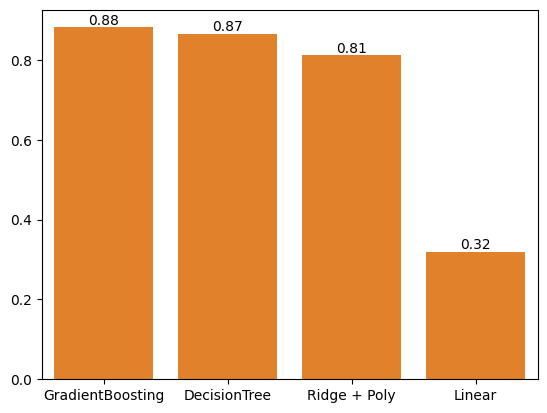

In [37]:

data = [gradient_model_cv_10.mean(), tree_model_cv_10.mean(), ridge_model_cv_10_poly.mean(), linear_model_cv_10.mean()]
labels = ['GradientBoosting', 'DecisionTree', 'Ridge + Poly', 'Linear']

ax = sns.barplot(x=labels, y=data)

sns.barplot(x=labels, y=data, ax=ax).bar_label(ax.containers[0], fmt='%.2f')

[Text(0, 0, '7861.60'),
 Text(0, 0, '8553.96'),
 Text(0, 0, '12709.52'),
 Text(0, 0, '44559.95')]

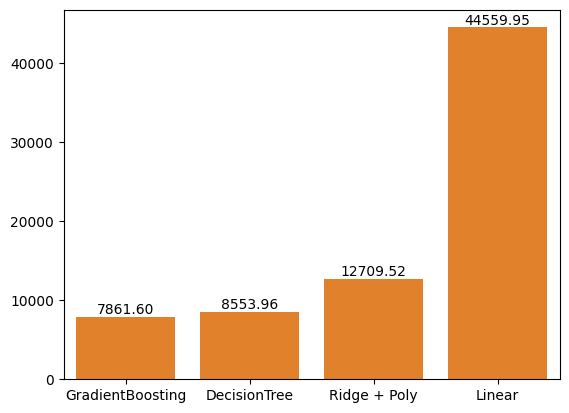

In [38]:
data = [gradient_test_mse, tree_test_mse, ridge_test_mse, linear_test_mse]
labels = ['GradientBoosting', 'DecisionTree', 'Ridge + Poly', 'Linear']

ax = sns.barplot(x=labels, y=data)

sns.barplot(x=labels, y=data, ax=ax).bar_label(ax.containers[0], fmt='%.2f')

In [40]:
# pred_linear_test_be_oru= best_pipeline_linear_be_oru.predict(Xtest_be_oru )
# spejimai_es_linear_be_oru = pd.Series(data=pred_linear_test_be_oru, name='Spėjimas_be_oru')
pred_gradient_test= best_pipeline_gradient.predict(Xtest)
spejimai_es_gradient = pd.Series(data=pred_gradient_test, name='Prediction GradientBoosting')
es_gradient_test = pd.concat([ytest.reset_index(), spejimai_es_gradient], axis=1)
es_gradient_test.set_index('Time', inplace=True)
es_gradient_test

,Actual electricity consumption,Prediction GradientBoosting
Time,,
2024-06-24 23:00:00,1151.843,1201.400726
2024-06-25 00:00:00,1045.872,1104.015310
2024-06-25 01:00:00,977.676,1060.279691
2024-06-25 02:00:00,950.405,1031.908893
2024-06-25 03:00:00,939.915,1031.908893
...,...,...
2024-07-01 19:00:00,1429.136,1385.623854
2024-07-01 20:00:00,1363.344,1385.623854
2024-07-01 21:00:00,1348.061,1362.663999


C:\Users\runda\AppData\Local\Temp\ipykernel_10076\2745342282.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  gradient_graph.set_xticklabels(['2', '3', '4', '5', '6', '7', '1', '2'])


[Text(19899.0, 0, '2'),
 Text(19900.0, 0, '3'),
 Text(19901.0, 0, '4'),
 Text(19902.0, 0, '5'),
 Text(19903.0, 0, '6'),
 Text(19904.0, 0, '7'),
 Text(19905.0, 0, '1'),
 Text(19906.0, 0, '2')]

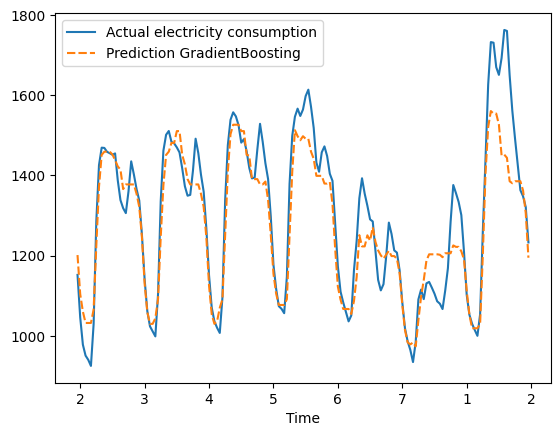

In [41]:
gradient_graph = sns.lineplot(es_gradient_test)
gradient_graph.set_xticklabels(['2', '3', '4', '5', '6', '7', '1', '2']) 

In [43]:
pred_tree_test= best_pipeline_tree.predict(Xtest)
spejimai_es_tree = pd.Series(data=pred_tree_test, name='Prediction DecisionTree')
es_tree_test = pd.concat([ytest.reset_index(), spejimai_es_tree], axis=1)
es_tree_test.set_index('Time', inplace=True)
es_tree_test

,Actual electricity consumption,Prediction DecisionTree
Time,,
2024-06-24 23:00:00,1151.843,1191.968209
2024-06-25 00:00:00,1045.872,1119.105282
2024-06-25 01:00:00,977.676,1004.584288
2024-06-25 02:00:00,950.405,1004.584288
2024-06-25 03:00:00,939.915,1004.584288
...,...,...
2024-07-01 19:00:00,1429.136,1370.156083
2024-07-01 20:00:00,1363.344,1370.156083
2024-07-01 21:00:00,1348.061,1333.918729


C:\Users\runda\AppData\Local\Temp\ipykernel_10076\919297759.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tree_graph.set_xticklabels(['2', '3', '4', '5', '6', '7', '1', '2'])


[Text(19899.0, 0, '2'),
 Text(19900.0, 0, '3'),
 Text(19901.0, 0, '4'),
 Text(19902.0, 0, '5'),
 Text(19903.0, 0, '6'),
 Text(19904.0, 0, '7'),
 Text(19905.0, 0, '1'),
 Text(19906.0, 0, '2')]

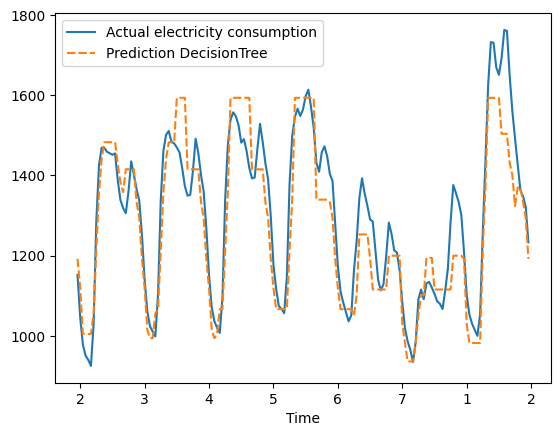

In [44]:
tree_graph = sns.lineplot(es_tree_test)
tree_graph.set_xticklabels(['2', '3', '4', '5', '6', '7', '1', '2']) 

In [46]:
pred_ridge_test_be_oru= best_pipeline_ridge_be_oru.predict(Xtest_be_oru )
spejimai_es_ridge_be_oru = pd.Series(data=pred_ridge_test_be_oru, name='Spėjimas_be_oru')
pred_ridge_test= best_pipeline_ridge.predict(Xtest)
spejimai_es_ridge = pd.Series(data=pred_ridge_test, name='Spėjimas')
pred_ridge_test_poly= best_pipeline_ridge_poly.predict(Xtest)
spejimai_es_ridge_poly = pd.Series(data=pred_ridge_test_poly, name='Spėjimas_poly')
es_ridge_test = pd.concat([ytest_be_oru.reset_index(), spejimai_es_ridge, spejimai_es_ridge_be_oru, spejimai_es_ridge_poly], axis=1)
es_ridge_test.set_index('Time', inplace=True)
es_ridge_test

,Actual electricity consumption,Spėjimas,Spėjimas_be_oru,Spėjimas_poly
Time,,,,
2024-06-24 23:00:00,1151.843,1213.966970,1207.572558,1261.599920
2024-06-25 00:00:00,1045.872,875.825440,857.230568,970.951082
2024-06-25 01:00:00,977.676,955.994931,937.127512,969.495547
2024-06-25 02:00:00,950.405,1030.269492,1011.250196,992.316111
2024-06-25 03:00:00,939.915,1098.649123,1079.598620,1033.208375
...,...,...,...,...
2024-07-01 19:00:00,1429.136,1366.605350,1356.965378,1362.425892
2024-07-01 20:00:00,1363.344,1335.355864,1328.111390,1329.960962
2024-07-01 21:00:00,1348.061,1297.861296,1293.483142,1296.056337


C:\Users\runda\AppData\Local\Temp\ipykernel_10076\2891721797.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ridge_graph.set_xticklabels(['2', '3', '4', '5', '6', '7', '1', '2'])


[Text(19899.0, 0, '2'),
 Text(19900.0, 0, '3'),
 Text(19901.0, 0, '4'),
 Text(19902.0, 0, '5'),
 Text(19903.0, 0, '6'),
 Text(19904.0, 0, '7'),
 Text(19905.0, 0, '1'),
 Text(19906.0, 0, '2')]

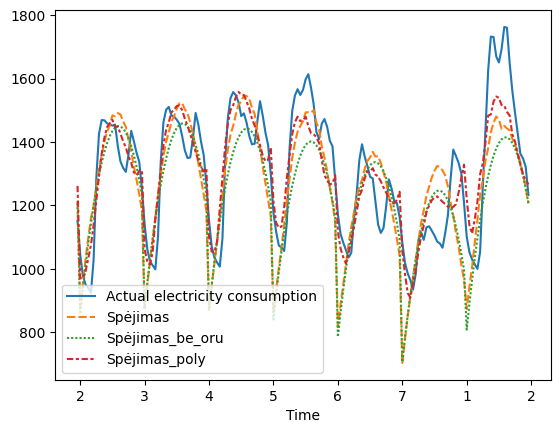

In [47]:
ridge_graph = sns.lineplot(es_ridge_test)
ridge_graph.set_xticklabels(['2', '3', '4', '5', '6', '7', '1', '2']) 